In [45]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
def get_X_and_Y(filename):
    data = pd.read_csv(filename)
    dataX = data.drop(columns=['Unnamed: 0','Creditability']).values
    dataY = data['Creditability'].values
    return dataX,dataY

In [5]:
trainX,trainY = get_X_and_Y('data/train.csv')
testX,testY = get_X_and_Y('data/test.csv')

In [7]:
trainX.shape,trainY.shape,testX.shape,testY.shape

((500, 20), (500,), (500, 20), (500,))

In [8]:
parameter_decision_tree = {
    'criterion':('gini','entropy'),
    'splitter':('best','random'),
    'max_depth':(2,5,10,20)
}

In [9]:
parameter_random_forest = {
    'criterion':('gini','entropy'),
    'max_depth':(2,5,10,20),
    'n_estimators':(10,100,200)
}

In [10]:
rf_clf = GridSearchCV(RandomForestClassifier(n_jobs=-1), parameter_random_forest, cv=10) 
dt_clf = GridSearchCV(DecisionTreeClassifier(), parameter_decision_tree, cv=10) 

In [11]:
rf_clf.fit(trainX,trainY)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ('gini', 'entropy'), 'max_depth': (2, 5, 10, 20), 'n_estimators': (10, 100, 200)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [12]:
rf_clf.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 100}

In [13]:
accuracy_score(trainY,rf_clf.predict(trainX)) 

0.974

In [14]:
accuracy_score(testY,rf_clf.predict(testX)) 

0.736

In [15]:
dt_clf.fit(trainX,testY)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ('gini', 'entropy'), 'splitter': ('best', 'random'), 'max_depth': (2, 5, 10, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [16]:
dt_clf.best_params_

{'criterion': 'gini', 'max_depth': 2, 'splitter': 'best'}

In [17]:
accuracy_score(trainY,dt_clf.predict(trainX))

0.712

In [18]:
accuracy_score(testY,dt_clf.predict(testX))

0.674

In [65]:
def plot_parameter_performance(model):
    scores = [i[1] for i in model.grid_scores_]
    print(model.grid_scores_[model.best_index_][0])
    plt.plot(range(len(scores)),scores,'-*',markevery=[model.best_index_],markerfacecolor='red',markersize=15)

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 100}


/home/hitkul/anaconda3/envs/ml_ass/lib/python3.6/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/home/hitkul/anaconda3/envs/ml_ass/lib/python3.6/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


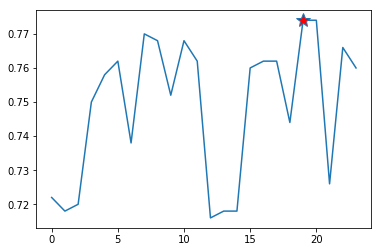

In [66]:
plot_parameter_performance(rf_clf)

{'criterion': 'gini', 'max_depth': 2, 'splitter': 'best'}


/home/hitkul/anaconda3/envs/ml_ass/lib/python3.6/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/home/hitkul/anaconda3/envs/ml_ass/lib/python3.6/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


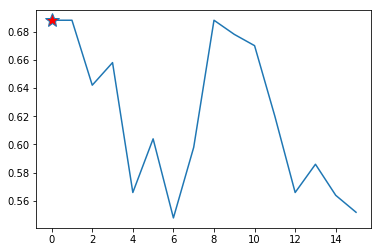

In [67]:
plot_parameter_performance(dt_clf)

In [77]:
def plot_learning_curve(model,trainX,trainY):
    train_sizes, train_scores, valid_scores = learning_curve(model, trainX, trainY, train_sizes=[100, 200, 300,400,449], cv=10)
    mean_train_score = pd.np.mean(train_scores,axis=1)
    mean_valid_score = pd.np.mean(valid_scores,axis=1)
    plt.plot(train_sizes,mean_train_score)
    plt.plot(train_sizes,mean_valid_score)

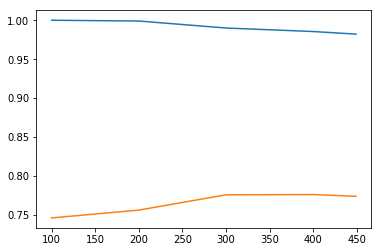

In [78]:
plot_learning_curve(rf_clf.best_estimator_,trainX,trainY)

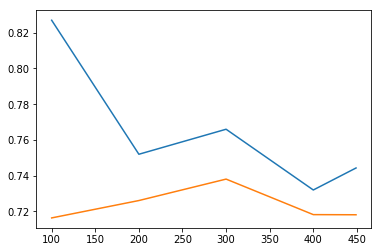

In [79]:
plot_learning_curve(dt_clf.best_estimator_,trainX,trainY)

In [ ]:
rf_clf